In [1]:
import numpy as np

In [2]:
state = {
    0 : "Burger",
    1 : "Pizza",
    2 : "Hotdog"
}
state

{0: 'Burger', 1: 'Pizza', 2: 'Hotdog'}

### Transition matrix

In [3]:
# A_ij = P(X_n = j | X_n-1 = i)
A = np.array([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])
A

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

### Random Walk on Markow Chain 

In [4]:
n = 15
start_state = 0
curr_state = start_state
print(state[curr_state], "--->", end=" ")

while n-1:
    curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
    print(state[curr_state], "--->", end=" ")
    n-=1
print("stop")

Burger ---> Pizza ---> Hotdog ---> Hotdog ---> Hotdog ---> Burger ---> Pizza ---> Hotdog ---> Hotdog ---> Burger ---> Pizza ---> Hotdog ---> Burger ---> Burger ---> Burger ---> stop


### Monte Carlo (MCMC

In [7]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

pi_normalized = pi/steps
print("π = ", pi_normalized)

π =  [0.352595 0.211324 0.436082]


### Finding probability of a particular sequence

In [12]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([1, 2, 2, 0], A, pi_normalized))

0.0369817


# MCweather

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 28 21:46:45 2021

@author: Izat
"""


import numpy as np
from numpy.linalg import matrix_power

events = ['rainy', 'sunny', 'cloudy']

transition = np.array([[0.5, 0.25, 0.25], [0.5, 0, 0.5], [0.25, 0.25, 0.5]])

rain_ = np.array([1, 0, 0])
sun_ = np.array([0, 1, 0])
cloud_ = np.array([0, 0, 1])

sun_pred = sun_.dot(matrix_power(transition, 7))



#evals, evecs = np.linalg.eig(transition.T)
#evec1 = evecs[:,np.isclose(evals, 1)]

#evec1 = evec1[:,0]

#stationary = evec1 / evec1.sum()

#stationary = stationary.real
stationary = []
i = 1
while True:
  sun_pred_1 = sun_.dot(matrix_power(transition, i))
  sun_pred_2 = sun_.dot(matrix_power(transition, i+2))
  stationary = sun_pred_2
  if(all(sun_pred_1 == sun_pred_2)):
    break
  i+=1



print(stationary)

#stationary distribution
#talk about rock reconstruction (porosity, permeability)

[0.4 0.2 0.4]


# MCarea

IndexError: index 491 is out of bounds for axis 0 with size 252

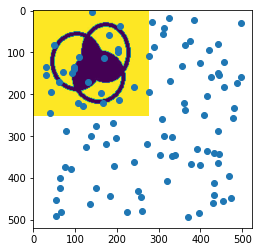

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 28 18:34:15 2021

@author: Izat
"""


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image





obj = np.array(Image.open("sample.jpg"))[:, :, 0]
plt.imshow(obj)
 
gen_num = 100
a = np.random.uniform(0, 500, gen_num)
b = np.random.uniform(0, 500, gen_num)
rand_map = np.vstack((a, b)).astype('int')
plt.plot(rand_map[0, :], rand_map[1, :], 'o')

#mapping
a = obj[rand_map[1, :], rand_map[0, :]] == 0
#find number of point in zone
number_of_p_in_zone = np.sum(a)


total_area = 150
area = (number_of_p_in_zone/gen_num)*total_area
    




def MCarea(total_area, gen_num):
    obj = np.array(Image.open("sample.jpg"))[:, :, 0]    
    a = np.random.uniform(0, len(obj[0, :]), gen_num)
    b = np.random.uniform(0, len(obj[:, 0]), gen_num)
    rand_map = np.vstack((a, b)).astype('int')
    plt.plot(rand_map[0, :], rand_map[1, :], 'o')
    
    #mapping
    a = obj[rand_map[1, :], rand_map[0, :]] == 0
    #find number of point in zone
    number_of_p_in_zone = np.sum(a)
    
    #area
    area = (number_of_p_in_zone/gen_num)*total_area
    
    return(area)


#test on stability
gen_test = np.arange(10, 50000, 30)
data = []
for i in range(len(gen_test)):
    data.append(MCarea(100, gen_test[i]))
    
    
plt.plot(gen_test, data)

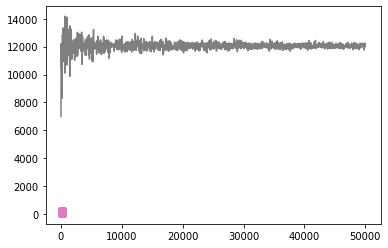

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def MCarea(img, gen_num):
    obj = np.array(img)[:, :, 0]    
    a = np.random.randint(0, len(obj[0, :]), gen_num)
    b = np.random.randint(0, len(obj[:, 0]), gen_num)
    rand_map = np.vstack((a, b)).astype('int')
    plt.plot(rand_map[0, :], rand_map[1, :], 'o')
    total_area = np.shape(obj)[0]*np.shape(obj)[1]
    #mapping
    a = obj[rand_map[1, :], rand_map[0, :]] == 0
    #find number of point in zone
    number_of_p_in_zone = np.sum(a)
    
    #area
    area = (number_of_p_in_zone/gen_num)*total_area
    
    return(area)


#test on stability
img = Image.open(r"sample.jpg")
gen_test = np.arange(10, 50000, 30)
data = []
for i in range(len(gen_test)):
    data.append(MCarea(img, gen_test[i]))
    
    
plt.plot(gen_test, data)